# For collab

In [118]:
collab=1
if collab:
  from google.colab import drive
  drive.mount('/content/drive')
# #prashantpath
#   %cd /content/drive/MyDrive/Projects/NepSense/Prashant/Profanity Detection
# #samirpath
# # %cd /content/drive/MyDrive/NepSense/Prashant/Profanity Detection
# ReePath
  %cd /content/drive/MyDrive/NepSense/Prashant/Profanity Detection

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1Joee7UAolU7NyrE09jVs709DtRl1K7Eg/NepSense/Prashant/Profanity Detection


# Necessary library

In [119]:
# %pip install pandas --update
# %pip install matplotlib==3.9.0
# %pip install seaborn==0.13.2
# %pip install ai4bharat-transliteration==1.1.3
# %pip install gensim==4.3.2
# %pip install requests==2.22.0
# %pip install wget==3.2
# %pip install beautifulsoup4==4.12.3
# %pip install news-please==1.5.44
# %pip install pytesseract==0.3.10
# %pip install spello==1.2.0
# %pip install snowballstemmer==2.2.0
# %pip install tensorflow==2.16.1
# %pip install sentencepiece==0.2.0
# %pip install scikit-learn==1.4.2
# %pip install pydload==1.0.9
# %pip install tensorboardX==2.6.2.2
# %pip install fairseq @ git+https://github.com/liyaodev/fairseq.git@b963eac7a04c539ad59fb1e23277f2ff7ee29e74
# %pip install opencv-python==4.9.0.80
# %pip install transformers==4.41.0
# %pip install nepali-to-roman==1.1.1
# %pip install nepali-unicode-converter==1.0.3
# %pip install langdetect==1.0.9
# %pip install nltk==3.8.1
# %pip install tqdm

# Input and Output paths

In [120]:
# load the to-be-tested dataset
filename="dataset_facebook-comments-scraper_2024-05-04_06-05-34-173.csv"
to_be_tested_dataset_input_path=f"../Facebook Datas/{filename}"
filtered_dataset_output_path=f"../Profanity and Gender filtered Datas/{filename}"

# Keyword Gathering


### Manual Tagging Profanity Keywords

In [121]:
import pandas as pd
manual_tagging_df = pd.read_csv("./filterwordlist.csv")
manual_tagging_df

,RawRom,RawNep,NormNep,NormRom,Offensiveness,IsTaboo,Class,Class_Other,Profanity,Offensive
0,adhinayak,अधिनायक,अधिनायक,adhinayak,1.0,0.0,Politics,NaN,0,NaN
1,adhinayak tantra,अधिनायक तन्त्र,अधिनायक तन्त्र,adhinayak tantra,1.0,0.0,Politics,NaN,NaN,NaN
2,adhinayakatwa,अधिनायकत्व,अधिनायकत्व,adhinayakatwa,1.0,0.0,Politics,NaN,NaN,NaN
3,adhinayakbad,अधिनायकवाद,अधिनायकवाद,adhinayakbad,1.0,0.0,Politics,NaN,NaN,NaN
4,adhinayakbadi,अधिनायकवादी,अधिनायकवादी,adhinayakbadi,1.0,0.0,Politics,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,point to be noted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043,hijada only is nothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# Checking the number of unique value in Profanity column
manual_tagging_df["Profanity"].value_counts()

Profanity
1            265
0            138
x              1
Profanity      1
Name: count, dtype: int64

In [123]:
# Checking the number of unique value in Offensive column
manual_tagging_df["Offensive"].value_counts()

Offensive
1            214
0             58
x              1
Offensive      1
Name: count, dtype: int64

In [124]:
# Ensure the 'Profanity' and 'Offensive' column is treated as strings
manual_tagging_df['Profanity'] = manual_tagging_df['Profanity'].astype(str)
manual_tagging_df['Offensive'] = manual_tagging_df['Offensive'].astype(str)

# Filter the manual_tagging_df DataFrame to get only the rows where the Profanity is '1'
manual_profanity_df = manual_tagging_df[manual_tagging_df["Profanity"] == '1']

# Filter the manual_tagging_df DataFrame to get only the rows where the Offensive is '1'
manual_offensive_df = manual_tagging_df[manual_tagging_df["Offensive"] == '1']

# Reset the index of the manual_profanity_df DataFrame and drop the old index (optional)
manual_profanity_df = manual_profanity_df.reset_index(drop=True)

# Reset the index of the manual_offensive_df DataFrame and drop the old index (optional)
manual_offensive_df = manual_offensive_df.reset_index(drop=True)

# The manual_profanity_df DataFrame now contains only the rows where the Profanity is '1', with a new index
manual_profanity_df

,RawRom,RawNep,NormNep,NormRom,Offensiveness,IsTaboo,Class,Class_Other,Profanity,Offensive
0,alachhin,अलच्छिन,अलच्छिन,alachchhin,1.0,0.0,Other,NaN,1,nan
1,alachhini,अलछिनि,अलच्छिनी,alachhini,4.0,0.0,Other,NaN,1,nan
2,aatankakari,आतङ्ककारी,आतङ्ककारी,aatankakari,2.0,0.0,Politics,NaN,1,nan
3,atankakari,आतंककारी,आतङ्ककारी,aatankakari,2.0,0.0,Politics,NaN,1,nan
4,aatankakari,आतंककारि,आतङ्ककारी,aatankakari,2.0,0.0,Politics,NaN,1,nan
...,...,...,...,...,...,...,...,...,...,...
260,hagnu,हग्नु,हग्नु,hagnu,5.0,1.0,Excretion,Action,1,1
261,harami,हरामी,हरामी,harami,4.0,0.0,Other,NaN,1,1
262,hastamaithun,हस्तमैथुन,हस्तमैथुन,hastamaithun,5.0,1.0,Vulgar,NaN,1,nan
263,hutihara,हूतीहारा,हुतीहारा,hutihara,4.0,0.0,Other,NaN,1,nan


In [125]:
manual_offensive_df

,RawRom,RawNep,NormNep,NormRom,Offensiveness,IsTaboo,Class,Class_Other,Profanity,Offensive
0,andhabhakta,अन्धभक्त,अन्धभक्त,andhabhakta,2.0,0.0,Politics,NaN,nan,1
1,andha,अन्धा,अन्धा,andha,3.0,0.0,Disability,Body Part,nan,1
2,fuck,फक,फक,phak,5.0,1.0,Vulgar,Imported,1,1
3,fatah,फटाहा,फटाहा,phataha,1.0,0.0,Other,NaN,0,1
4,fataha,फटाहा,फटाहा,phataha,1.0,0.0,Other,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...
209,hawa kura,हावा कुुरा,हावा कुरा,hawa kura,3.0,0.0,Other,NaN,nan,1
210,hawa buda,हावा बूडा,हावा बुढा,hawa budha,4.0,0.0,Other,NaN,nan,1
211,hawadari,हावादारी,हावादारी,hawadari,4.0,0.0,Other,NaN,nan,1
212,hutihara,हुतीहारा,हुतीहारा,hutihara,4.0,0.0,Other,NaN,0,1


In [126]:
# Initialize an empty set for profanity words
profnaity_word_set = set()

# Update the profanity word set with the RawNep, RawRom, NormNep, and NormRom columns from the manual_profanity_df DataFrame
profnaity_word_set.update(
    set(manual_profanity_df["RawNep"]),
    set(manual_profanity_df["RawRom"]),
    set(manual_profanity_df["NormNep"]),
    set(manual_profanity_df["NormRom"])
)

# The profnaity_word_set set now contains unique profanity words from the RawNep, RawRom, NormNep, and NormRom columns of the manual_profanity_df DataFrame
profnaity_word_set

{'aatankabadhi',
 'aatankabadi',
 'aatankakari',
 'alachchhin',
 'alachhin',
 'alachhini',
 'atankabadi',
 'atankakari',
 'baiya',
 'bajiya',
 'balatkar',
 'balatkari',
 'banjhi',
 'banjho',
 'banji',
 'banjo',
 'beshya',
 'beshyalaya',
 'besia',
 'besya',
 'besyalaya',
 'bhak mujhi',
 'bhak muji',
 'bhalu',
 'bharjin',
 'bhayan chod',
 'bhiringi',
 'bhosada',
 'bhosadi',
 'bhutla',
 'bhutrako',
 'bhutro',
 'bhutroko',
 'bideshiko chhad',
 'bidhur',
 'birya',
 'boka',
 'boke',
 'boko',
 'bra',
 'bra ',
 'bra laal',
 'bujhi randi',
 'chak',
 'chandal',
 'chatnu',
 'chatnu, chhatnu',
 'cher',
 'chhakka',
 'chher',
 'chhttho',
 'chikam',
 'chikdai',
 'chikne',
 'chikum',
 'chod',
 'choda',
 'chusnu',
 'chut',
 'chutdaka',
 'chutdike',
 'chutini',
 'chutiya',
 'chutiyagiri',
 'daamnaa',
 'daka',
 'dakka',
 'dalal dhoti',
 'damini',
 'damna',
 'damni',
 'dhoti ko chhauro',
 'dhoti ko gu',
 'dhotiko chhauro',
 'dhotiko gu',
 'dhotini',
 'dudh',
 'dudh ka poka',
 'dudh ko poka',
 'fuck',
 'ga

In [127]:
# Initialize an empty set for offensive words
offensive_word_set = set()

# Update the offensive word set with the RawNep, RawRom, NormNep, and NormRom columns from the manual_offensive_df DataFrame
offensive_word_set.update(
    profnaity_word_set,
    set(manual_profanity_df["RawNep"]),
    set(manual_profanity_df["RawRom"]),
    set(manual_profanity_df["NormNep"]),
    set(manual_profanity_df["NormRom"])
)

offensive_word_set=set(offensive_word_set)

# The offensive_word_set set now contains unique offensive words from the RawNep, RawRom, NormNep, and NormRom columns of the manual_offensive_df DataFrame
offensive_word_set

{'aatankabadhi',
 'aatankabadi',
 'aatankakari',
 'alachchhin',
 'alachhin',
 'alachhini',
 'atankabadi',
 'atankakari',
 'baiya',
 'bajiya',
 'balatkar',
 'balatkari',
 'banjhi',
 'banjho',
 'banji',
 'banjo',
 'beshya',
 'beshyalaya',
 'besia',
 'besya',
 'besyalaya',
 'bhak mujhi',
 'bhak muji',
 'bhalu',
 'bharjin',
 'bhayan chod',
 'bhiringi',
 'bhosada',
 'bhosadi',
 'bhutla',
 'bhutrako',
 'bhutro',
 'bhutroko',
 'bideshiko chhad',
 'bidhur',
 'birya',
 'boka',
 'boke',
 'boko',
 'bra',
 'bra ',
 'bra laal',
 'bujhi randi',
 'chak',
 'chandal',
 'chatnu',
 'chatnu, chhatnu',
 'cher',
 'chhakka',
 'chher',
 'chhttho',
 'chikam',
 'chikdai',
 'chikne',
 'chikum',
 'chod',
 'choda',
 'chusnu',
 'chut',
 'chutdaka',
 'chutdike',
 'chutini',
 'chutiya',
 'chutiyagiri',
 'daamnaa',
 'daka',
 'dakka',
 'dalal dhoti',
 'damini',
 'damna',
 'damni',
 'dhoti ko chhauro',
 'dhoti ko gu',
 'dhotiko chhauro',
 'dhotiko gu',
 'dhotini',
 'dudh',
 'dudh ka poka',
 'dudh ko poka',
 'fuck',
 'ga

### NepSA Profanity Keywords

In [128]:
# Read the NepSA.csv file into a pandas DataFrame
NepSA_df = pd.read_csv("./NepSA.csv", header=None)

# Rename the columns of the DataFrame
NepSA_df = NepSA_df.rename(columns={1: "Type", 2: "Keyword", 3: "Data"})

# Drop the first column of the DataFrame
NepSA_df = NepSA_df.drop(columns=[0])

# The NepSA_df DataFrame now contains the data from the csv file with the specified column names
NepSA_df

,Type,Keyword,Data
0,GENERAL,शोषक,यो मुजि बानियाँ ले कस्तो खाते कुरा गर्दैछ कुलम...
1,GENERAL,उल्लु बनाए,सबै भन्दा ठुलो सरकार ले नै सबै लाई उल्लु बनाए ...
2,GENERAL,न पहिला ठिक थियो न अहिले ठिक छ,यो पुलिस न पहिला ठिक थियो न अहिले ठिक छ यस्तो ...
3,GENERAL,चोर,यिनी चोर हरु ले जनता लाई अन्धकार मा रखेर आफ्नो...
4,GENERAL,हरास,सहि कुरा के पि को अस्तित्व हरास हुदैछ !
...,...,...,...
1695,FEEDBACK,कार्वाही हुनुपर्छ,गाडी एकदम राम्रो छ तर रोड भने आलु जस्तो छ दुइच...
1696,FEEDBACK,आवश्यक छ,गाडी एकदम राम्रो छ तर रोड भने आलु जस्तो छ दुइच...
1697,FEEDBACK,कम हुन्छ,कम से कम वायु प्रदूषण त कम हुन्छ ।
1698,FEEDBACK,लानु पर्छ,अब यसरी नै अन्य बस हरु थप्दै लानु पर्छ ।


In [129]:
# Checking the number of unique value in Type column
NepSA_df["Type"].value_counts()

Type
FEEDBACK     508
GENERAL      500
PROFANITY    407
VIOLENCE     285
Name: count, dtype: int64

In [130]:
# Filter the NepSA_df to get only the rows where the Type is "PROFANITY"
NepSA_profanity_df = NepSA_df[NepSA_df["Type"]=="PROFANITY"]

# Create a set of unique profanity keywords from the NepSA_profanity_df
NepSaprofane = set(NepSA_profanity_df["Keyword"])
NepSaprofane

{'gunda चोर अनि बलातकारि',
 'saale चोर',
 'अपराधी',
 'अपराधी डाँका',
 'अलछिना',
 'उत्तानो भएर थाप्ने',
 'कंलड़कित',
 'ककुरनि',
 'कन्डम फुटेर जन्मे को',
 'कलङ्क',
 'कुकुर',
 'कुकुर कुकुर्नी',
 'कुकुर को छाऊरो',
 'कुकुर को बच्चा हरु',
 'कुकुर डाका',
 'कुकुर बलतकारि',
 'कुकुरनि',
 'कुकुरनी',
 'कुत्ता',
 'खाते',
 'खाते चाेर',
 'खाते दलाल',
 'खाते मुजि',
 'खाते मुला',
 'खाते रन्डि को छोरा',
 'गद्दार',
 'गधा',
 'गु खा साल',
 'गोरु',
 'गोरु जस्तो मुजि डण्ठे',
 'घुसखोर ददाल भ्रस्ट लाई मुर्दाबाद',
 'चम्चा साला',
 'चाेर',
 'चाेरै चाेर',
 'चिकायो',
 'चिक्ने',
 'चिक्यो',
 'चिलाएर मोज गरिस',
 'चुतिया',
 'चुतिया भ्रष्टाचार को नाइके',
 'चुप साला',
 'चोर',
 'चोर , दलाल , भ्रष्ट , बलत्कारी',
 'चोर डाँ का',
 'चोर दलाल',
 'चोर भ्रस्ट',
 'चोर र फटाहा',
 'चोर साले',
 'चोरि',
 'चोरै चोर',
 'चौथो लिंगि',
 'छक्क',
 'छक्का',
 'छाडा रन्दि को छोरा',
 'जन्तु',
 'जाँठा',
 'जाँठा डाका',
 'जाठा',
 'जाठी',
 'जाठो',
 'जुठो खाने भतुवा कुकुर',
 'झुटे मुजि',
 'झोले कुकुर',
 'डम्ना',
 'डाका',
 'तेरि मा टोक्ने',
 'तेरि मा ड

In [131]:
# Update the profanity word set with the NepSaprofane set
profnaity_word_set.update(NepSaprofane)

# Convert the updated profanity word set to a list
profnaity_word_list = list(profnaity_word_set)
profnaity_word_set

{'aatankabadhi',
 'aatankabadi',
 'aatankakari',
 'alachchhin',
 'alachhin',
 'alachhini',
 'atankabadi',
 'atankakari',
 'baiya',
 'bajiya',
 'balatkar',
 'balatkari',
 'banjhi',
 'banjho',
 'banji',
 'banjo',
 'beshya',
 'beshyalaya',
 'besia',
 'besya',
 'besyalaya',
 'bhak mujhi',
 'bhak muji',
 'bhalu',
 'bharjin',
 'bhayan chod',
 'bhiringi',
 'bhosada',
 'bhosadi',
 'bhutla',
 'bhutrako',
 'bhutro',
 'bhutroko',
 'bideshiko chhad',
 'bidhur',
 'birya',
 'boka',
 'boke',
 'boko',
 'bra',
 'bra ',
 'bra laal',
 'bujhi randi',
 'chak',
 'chandal',
 'chatnu',
 'chatnu, chhatnu',
 'cher',
 'chhakka',
 'chher',
 'chhttho',
 'chikam',
 'chikdai',
 'chikne',
 'chikum',
 'chod',
 'choda',
 'chusnu',
 'chut',
 'chutdaka',
 'chutdike',
 'chutini',
 'chutiya',
 'chutiyagiri',
 'daamnaa',
 'daka',
 'dakka',
 'dalal dhoti',
 'damini',
 'damna',
 'damni',
 'dhoti ko chhauro',
 'dhoti ko gu',
 'dhotiko chhauro',
 'dhotiko gu',
 'dhotini',
 'dudh',
 'dudh ka poka',
 'dudh ko poka',
 'fuck',
 'ga

In [132]:
# Convert the updated profanity word set to a list
offensive_word_list = list(offensive_word_set)
offensive_word_list

['चुतियागिरी',
 'khateay',
 'नाईटी',
 'banjhi',
 'tero hajurbau',
 'मुजी धोती',
 'chutini',
 'धोतीनी',
 'केराखा',
 'चुतिनी',
 'मैथुन',
 'gu gobar',
 'chusnu',
 'वीर्य',
 'randikhana',
 'आतङ्कवादि',
 'मुजि',
 'randiko chhora',
 'रन्दि',
 'jatha',
 'chutdike',
 'तोर्मे',
 'bidhur',
 'terima jhakne',
 'चन्डाल',
 'chikdai',
 'hagnu',
 'gu khane',
 'timro bau',
 'थुन',
 'तेरो बाउको ठाडो',
 'चिक्दै',
 'आतंककारि',
 'मुथ',
 'lejbian',
 'rakshyas',
 'dhotiko gu',
 'besya',
 'yaunanga',
 'तेरो हजुरबाउ',
 'चिकुम',
 'माडे',
 'muth',
 'madnu',
 'भाक मुजी',
 'भालुु',
 'sale',
 'beshya',
 'कन्डो पछाडी कूरा काट्छ',
 'thukka syal',
 'balatkari',
 'अलच्छिनी',
 'धोतीको गु',
 'mulankhare',
 'pakhandi',
 'shukrakit',
 'gu biraloko jastai lukaunu',
 'तेरो आँखामा रतन्धो तेरो कान बहीरो र तेरो दीमाखमा गोबर भरीएको छ',
 'maderchod',
 'मादरचोद',
 'aatankabadhi',
 'mujhi dhoti',
 'आतंकवादी',
 'mathis',
 'torpe',
 'bharjin',
 'atankakari',
 'चीक्ने',
 'बजिया',
 'लठेव्री',
 'मादर',
 'bhak muji',
 'napunsak',
 'यौनाङ

In [133]:
# Calculate the length of the profanity word list
num_profanity_words = len(profnaity_word_list)

# Calculate the length of the offensive word set
num_offensive_words = len(offensive_word_list)

# Print the results
print("Total number of profanity words:", num_profanity_words)
print("Total number of offensive words:", num_offensive_words)

Total number of profanity words: 768
Total number of offensive words: 572


# Profanity and offensive filtering

### Importing to-be-tested Dataset

In [134]:
to_be_tested_dataset=pd.read_csv(to_be_tested_dataset_input_path)
to_be_tested_dataset[["text"]]

,text
0,चिनिया सरकार को सालो नेतृत्वपंक्ति हरु चसमा खो...
1,नेपाल मा मरुभूमि थिएन त्यसैले सरकार ले कृतिम म...
2,लोकसेवा पढ्ने साथीहररु को लागि महत्वपुर्ण प्रस...
3,Mirchaiya is one of Smart city in Siraha
4,what is this?
...,...
433,Saroj Dhamala king 😂
434,K vako
435,1St
436,Free makeup😂


In [135]:
to_be_tested_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   attachments/0/style_list/0  5 non-null      object 
 1   attachments/0/style_list/1  5 non-null      object 
 2   attachments/0/style_list/2  5 non-null      object 
 3   attachments/0/style_list/3  5 non-null      object 
 4   attachments/0/style_list/4  2 non-null      object 
 5   commentUrl                  438 non-null    object 
 6   commentsCount               93 non-null     float64
 7   date                        438 non-null    object 
 8   facebookId                  438 non-null    int64  
 9   facebookUrl                 438 non-null    object 
 10  feedbackId                  438 non-null    object 
 11  id                          438 non-null    object 
 12  likesCount                  438 non-null    int64  
 13  profileId                   438 non

### Profanity and offesive filtering function

In [136]:
# def profanity_offensive_filter(df, to_be_tested_column_name,output_column_name,matched_pattern_column_name, filterwords):
#     # Create a regex pattern from the filterwords | acts as 'OR' for regex
#     pattern = '|'.join(filterwords)
#     df[to_be_tested_column_name] = df[to_be_tested_column_name].fillna('')

#     # Filter the DataFrame using the regex pattern and specified column
#     selected_df = df[df[to_be_tested_column_name].str.contains(pattern, case=False, regex=True)]

#     # Create an empty list to store the results
#     results = []

#     # Iterate over the rows of the selected DataFrame
#     for index, row in selected_df.iterrows():
#         # Iterate over each filterword
#         for filterword in filterwords:
#             # Check if the filterword is present in the row's data
#             if filterword.lower() in row[to_be_tested_column_name].lower():
#                 # Append the row's data and the corresponding filterword to the results list
#                 results.append({
#                     to_be_tested_column_name: row[to_be_tested_column_name],
#                     output_column_name: 1,
#                     matched_pattern_column_name: filterword
#                 })
#                 break  # Break out of the inner loop since we found a match

#     # Convert the results list to a DataFrame
#     results_df = pd.DataFrame(results)

#     # Add the two new columns to the original DataFrame
#     df[output_column_name] = df.apply(lambda row: 1 if any(word.lower() in row[to_be_tested_column_name].lower() for word in filterwords) else 0, axis=1)
#     df[matched_pattern_column_name] = df.apply(lambda row: next((word for word in filterwords if word.lower() in row[to_be_tested_column_name].lower()), None), axis=1)

#     return selected_df, results_df, df

import pandas as pd

def profanity_offensive_filter(df, to_be_tested_column_name, output_column_name, matched_pattern_column_name, filterwords):
    # Create a regex pattern from the filterwords | acts as 'OR' for regex with word boundaries
    pattern = r'\b(?:' + '|'.join(map(re.escape, filterwords)) + r')\b'
    df[to_be_tested_column_name] = df[to_be_tested_column_name].fillna('')

    # Filter the DataFrame using the regex pattern and specified column
    selected_df = df[df[to_be_tested_column_name].str.contains(pattern, case=False, regex=True)]

    # Create an empty list to store the results
    results = []

    # Iterate over the rows of the selected DataFrame
    for index, row in selected_df.iterrows():
        # Iterate over each filterword
        for filterword in filterwords:
            # Check if the filterword is present in the row's data
            if re.search(r'\b' + re.escape(filterword) + r'\b', row[to_be_tested_column_name], re.IGNORECASE):
                # Append the row's data and the corresponding filterword to the results list
                results.append({
                    to_be_tested_column_name: row[to_be_tested_column_name],
                    output_column_name: 1,
                    matched_pattern_column_name: filterword
                })
                break  # Break out of the inner loop since we found a match

    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results)

    # Add the two new columns to the original DataFrame
    df[output_column_name] = df.apply(lambda row: 1 if any(re.search(r'\b' + re.escape(word) + r'\b', row[to_be_tested_column_name], re.IGNORECASE) for word in filterwords) else 0, axis=1)
    df[matched_pattern_column_name] = df.apply(lambda row: next((word for word in filterwords if re.search(r'\b' + re.escape(word) + r'\b', row[to_be_tested_column_name], re.IGNORECASE)), None), axis=1)

    return selected_df, results_df, df


### Applying the filteration function

In [137]:
selected_df, results_df, filtered_df = profanity_offensive_filter(to_be_tested_dataset, 'text',"Profanity","Profanity_Matched_Pattern" ,profnaity_word_list)

In [138]:
selected_df, results_df, filtered_df = profanity_offensive_filter(to_be_tested_dataset, 'text',"Offensive","Offensive_Matched_Pattern" ,offensive_word_list)

In [139]:
filtered_df[["text","Profanity","Profanity_Matched_Pattern","Offensive","Offensive_Matched_Pattern"]]

,text,Profanity,Profanity_Matched_Pattern,Offensive,Offensive_Matched_Pattern
0,चिनिया सरकार को सालो नेतृत्वपंक्ति हरु चसमा खो...,0,None,0,None
1,नेपाल मा मरुभूमि थिएन त्यसैले सरकार ले कृतिम म...,0,None,0,None
2,लोकसेवा पढ्ने साथीहररु को लागि महत्वपुर्ण प्रस...,0,None,0,None
3,Mirchaiya is one of Smart city in Siraha,0,None,0,None
4,what is this?,1,this,1,this
...,...,...,...,...,...
433,Saroj Dhamala king 😂,0,None,0,None
434,K vako,0,None,0,None
435,1St,0,None,0,None
436,Free makeup😂,0,None,0,None


In [140]:
num_profanity = filtered_df["Profanity"].sum()
num_offensive = filtered_df["Offensive"].sum()

print(f"Number of 1s in Profanity column: {num_profanity}")
print(f"Number of 1s in Offensive column: {num_offensive}")


Number of 1s in Profanity column: 20
Number of 1s in Offensive column: 20


# Gender Detection

#### Importing files

In [141]:
import pandas as pd

# Load boys' names and girls' names from Excel files
boys_names_df = pd.read_csv("./Boys Names Nepali + Indian - Names.csv")
girls_names_df = pd.read_csv("./Girl Name Nepali + Indian - Sheet1.csv")
voter_girls_names_df = pd.read_csv("voter_dataset_female.csv")
voter_boys_names_df = pd.read_csv("voter_dataset_male.csv")

#### Labeling, removing duplicate, null values for boys and girls

In [142]:
# Extract only the "Name" column and remove rows with missing values
boys_names_df = boys_names_df[["Name"]]
boys_names_df = boys_names_df.dropna()

# Assign a gender label (1 for boys)
boys_names_df = boys_names_df.assign(Gender=1)

# Split names separated by ';' or '/' and explode into multiple rows
boys_names_df['Name'] = boys_names_df['Name'].str.replace(';', ',').replace('/', ',').str.split(',')
boys_names_df = boys_names_df.explode('Name')

# Assign a gender label (1 for boys)
boys_names_df = boys_names_df.assign(Gender=1)
boys_names_df.head()

,Name,Gender
0,Aabishkar,1
1,Aadarsh,1
2,Aadarsh,1
2,Aaadarsh,1
3,Aadesh,1


In [143]:
# For girls' names
girls_names_df = girls_names_df[["Name"]]
girls_names_df = girls_names_df.dropna()

# Split names separated by ';' or '/' and explode into multiple rows
girls_names_df['Name'] = girls_names_df['Name'].str.replace(';', ',').replace('/', ',').str.split(',')
girls_names_df = girls_names_df.explode('Name')

# Assign a gender label (0 for girls)
girls_names_df = girls_names_df.assign(Gender=0)
girls_names_df.head()

,Name,Gender
0,Aanchal/Anchal,0
1,Aapti,0
2,Aarati/Arati,0
3,Aastha/Astha,0
4,Aayushi/Ayushi,0


In [144]:
voter_boys_names_df.rename(columns={'First_Name': 'Name'}, inplace=True)
voter_boys_names_df = voter_boys_names_df[["Name","Gender"]]
voter_boys_names_df

,Name,Gender
0,Agam,1
1,Ajay,1
2,Anil,1
3,Anish,1
4,Anis,1
...,...,...
187083,Singu,1
187084,Harawanta,1
187085,Kadda,1
187086,Nardish,1


In [145]:
voter_girls_names_df.rename(columns={'First_Name': 'Name'}, inplace=True)
voter_girls_names_df = voter_girls_names_df[["Name","Gender"]]
voter_girls_names_df

,Name,Gender
0,Anjana,0
1,Anju,0
2,Anita,0
3,Anu,0
4,Anupa,0
...,...,...
190862,Biladho,0
190863,Manahodar,0
190864,Maiyamoti,0
190865,Sikhama,0


#### Combining all the names in single dataframe

In [146]:
# Concatenate boys' and girls' names into one DataFrame
combined_names_df = pd.concat([boys_names_df, girls_names_df,voter_boys_names_df,voter_girls_names_df], ignore_index=True)

# Remove rows with missing values (NaN) in the "Name" column
combined_names_df = combined_names_df.dropna(subset=['Name'])

# Remove duplicate rows based on the "Name" column
combined_names_df = combined_names_df.drop_duplicates(subset=['Name'], keep='first')

# Reset index
combined_names_df = combined_names_df.reset_index(drop=True)

# Display the combined DataFrame
combined_names_df

,Name,Gender
0,Aabishkar,1
1,Aadarsh,1
2,Aaadarsh,1
3,Aadesh,1
4,Aadhin,1
...,...,...
381574,Biladho,0
381575,Manahodar,0
381576,Maiyamoti,0
381577,Sikhama,0


#### Conversion of Nepali name into English

In [147]:
# %pip install nepali-to-roman
# %pip install langdetect
from langdetect import detect
import re
import ntr

def capitalize_after_space(name):
    words = name.split()
    capitalized_words = [word.capitalize() for word in words]
    return ' '.join(capitalized_words)

def detect_nep_and_coversion(text):
      # Ensure that text is a string or convert it to a string if it's not
  if not isinstance(text, str):
      text = str(text)
  sentences = re.split(r'(?<=[.!?])\s+(?=\D)', text)
  english_comments = []
  for sentence in sentences:
      try:
          language = detect(sentence)
          if language == "ne":
            sentence=capitalize_after_space(ntr.nep_to_rom(sentence))
            english_comments.append(sentence)
          else:
            english_comments.append(sentence)
      except:
          pass
  filtered_comment = '.'.join(english_comments)
  return filtered_comment

In [148]:
filtered_df["English_Name"] = filtered_df["profileName"].apply(detect_nep_and_coversion)
filtered_df.head()

,attachments/0/style_list/0,attachments/0/style_list/1,attachments/0/style_list/2,attachments/0/style_list/3,attachments/0/style_list/4,commentUrl,commentsCount,date,facebookId,facebookUrl,...,profilePicture,profileUrl,text,English Coversion,NameDetection,Profanity,Profanity_Matched_Pattern,Offensive,Offensive_Matched_Pattern,English_Name
0,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/photo/?fbid=816312640...,NaN,2024-05-03T12:03:03.000Z,816312660530632,https://www.facebook.com/photo/?fbid=816312640...,...,https://scontent-lga3-2.xx.fbcdn.net/v/t39.308...,https://www.facebook.com/lalbabu.sah3,चिनिया सरकार को सालो नेतृत्वपंक्ति हरु चसमा खो...,LB Shah,Unknown,0,None,0,None,LB Shah
1,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/photo/?fbid=816312640...,NaN,2024-05-03T11:25:06.000Z,816312660530632,https://www.facebook.com/photo/?fbid=816312640...,...,https://scontent-lga3-1.xx.fbcdn.net/v/t39.308...,https://www.facebook.com/Dhiraazz,नेपाल मा मरुभूमि थिएन त्यसैले सरकार ले कृतिम म...,Dhiraj Shrestha,1,0,None,0,None,Dhiraj Shrestha
2,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/photo/?fbid=816312640...,NaN,2024-05-03T08:41:04.000Z,816312660530632,https://www.facebook.com/photo/?fbid=816312640...,...,https://scontent-lga3-2.xx.fbcdn.net/v/t39.308...,https://www.facebook.com/people/G%C3%BCpt%C3%A...,लोकसेवा पढ्ने साथीहररु को लागि महत्वपुर्ण प्रस...,Güptä Âñkît,Unknown,0,None,0,None,Güptä Âñkît
3,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/photo/?fbid=816312640...,NaN,2024-05-03T13:15:49.000Z,816312660530632,https://www.facebook.com/photo/?fbid=816312640...,...,https://scontent-lga3-2.xx.fbcdn.net/v/t39.308...,https://www.facebook.com/people/Dipendra-Yadav...,Mirchaiya is one of Smart city in Siraha,Dipendra Yadav,1,0,None,0,None,Dipendra Yadav
4,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/photo/?fbid=816312640...,NaN,2024-05-03T10:00:57.000Z,816312660530632,https://www.facebook.com/photo/?fbid=816312640...,...,https://scontent-lga3-2.xx.fbcdn.net/v/t39.308...,NaN,what is this?,Ram Bhai Subedi,1,1,this,1,this,Ram Bhai Subedi


#### Detection of Gender using Name

In [149]:
# Function to get gender based on name input
def get_gender_from_name(name):
    if ' ' in name:
        name = name.split(maxsplit=1)[0].capitalize()
    else:
        name = name.capitalize()
    gender = combined_names_df[combined_names_df['Name'] == name]['Gender'].values
    if len(gender) > 0:
        return gender[0]
    else:
        return 'Unknown'

In [150]:
filtered_df["Gender"]=filtered_df["English_Name"].apply(get_gender_from_name)
filtered_df[["English_Name","Gender"]].head()

,English_Name,Gender
0,LB Shah,Unknown
1,Dhiraj Shrestha,1
2,Güptä Âñkît,Unknown
3,Dipendra Yadav,1
4,Ram Bhai Subedi,1


#### Analysis of Gender Data

In [151]:
filtered_df["Gender"].value_counts()

Gender
1          249
Unknown    118
0           71
Name: count, dtype: int64

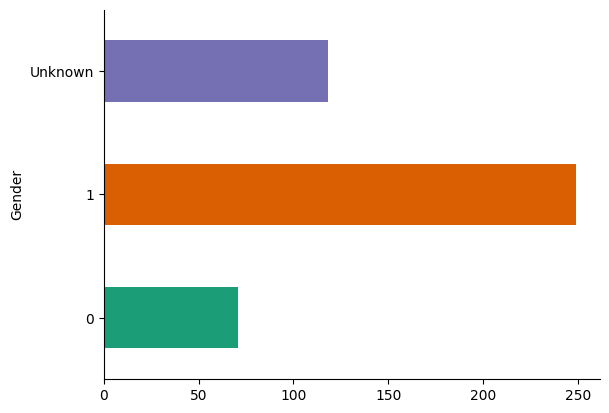

In [152]:
from matplotlib import pyplot as plt
import seaborn as sns
filtered_df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [153]:
# Assuming "dataset_facebook_comments" is your DataFrame
unknown_names_df = filtered_df[filtered_df["Gender"] == "Unknown"]

# Selecting only the "profileName" and "Gender" columns
unknown_names_df = unknown_names_df[["profileName", "Gender"]]

print(unknown_names_df["Gender"].value_counts())

# Displaying the filtered DataFrame
unknown_names_df

Gender
Unknown    118
Name: count, dtype: int64


,profileName,Gender
0,LB Shah,Unknown
2,Güptä Âñkît,Unknown
6,Dîñêšh Shãrmâ,Unknown
9,Roshanraj Shah,Unknown
11,एल बि आइ,Unknown
...,...,...
424,Hèrø Øf Thè Hèàrt,Unknown
425,Alexander Willian,Unknown
426,Razz Kant,Unknown
428,バンダリ クリシュナ プラシャド,Unknown


# English text to Nepali

In [154]:
# Convert NaN values to empty strings in the 'text' column
filtered_df.loc[:,'text'] = filtered_df['text'].fillna('')

In [155]:
import sys
import os
# Get the current working directory
current_dir = os.getcwd()

# Compute the root directory of the project
root_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Add the root directory to the sys.path
if root_dir not in sys.path:
    sys.path.insert(0, root_dir)

root_dir

'/content/drive/.shortcut-targets-by-id/1Joee7UAolU7NyrE09jVs709DtRl1K7Eg/NepSense/Prashant'

In [156]:
# model support the following languages : [as, bn, brx, gom, gu, hi, kn, ks, mai, ml, mni, mr, ne, or, pa, sa, sd, si, ta, te, ur]
# importing ai4bharat transliteration module
from ai4bharat.transliteration import XlitEngine
e = XlitEngine(["ne"], beam_width=10, src_script_type = "en")
out = e.translit_sentence("Good luck")
out

Initializing Multilingual model for transliteration


Loading dicts into RAM: 100%|██████████| 1/1 [00:04<00:00,  4.09s/it]


{'ne': 'गुड लक'}

In [157]:
from Preprocessing.Nepali_nlp.Nepali_nlp.unicode_nepali import Unicode
import pandas as pd
from langdetect import detect, LangDetectException
from nepali_unicode_converter.convert import Converter
from tqdm import tqdm

# Define your conversion functions
def nepali_nlp_text_conversion(text):
    if isinstance(text, str) and text.strip():
        try:
            lang = detect(text)
            if lang != "ne":
                return Unicode().unicode_word(text)
        except LangDetectException:
            pass
    return text

def ai4bharat_text_conversion(text):
    if isinstance(text, str) and text.strip():
        temp_results = e.translit_sentence(text)["ne"]
        return temp_results
    return text

# Define the function that applies conversions to the DataFrame
def nepali_nlp_conversion(df):
    converter = Converter()

    # Wrap the apply functions with tqdm for the progress bar
    tqdm.pandas(desc="Applying Nepali NLP Conversion")
    df["nepali_nlp_conversion"] = df["text"].progress_apply(nepali_nlp_text_conversion)

    tqdm.pandas(desc="Applying Unicode Conversion Conversion")
    df["unicode_conversion"] = df["text"].progress_apply(lambda x: converter.convert(x) if isinstance(x, str) else '')

    tqdm.pandas(desc="Applying ai4bharat Conversion")
    df["ai4bharat"] = df["text"].progress_apply(ai4bharat_text_conversion)
    return df

In [158]:
filtered_df=nepali_nlp_conversion(df=filtered_df.copy())
filtered_df[["text","unicode_conversion","nepali_nlp_conversion","ai4bharat"]]

Applying ai4bharat Conversion: 100%|██████████| 438/438 [02:40<00:00,  2.72it/s]


,text,unicode_conversion,nepali_nlp_conversion,ai4bharat
0,चिनिया सरकार को सालो नेतृत्वपंक्ति हरु चसमा खो...,चिनिया सरकार को सालो नेतृत्वपंक्ति हरु चसमा खो...,चिनिया सरकार को सालो नेतृत्वपंक्ति हरु चसमा खो...,चिनिया सरकार को सालो नेतृत्वपंक्ति हरु चसमा खो...
1,नेपाल मा मरुभूमि थिएन त्यसैले सरकार ले कृतिम म...,नेपाल मा मरुभूमि थिएन त्यसैले सरकार ले कृतिम म...,नेपाल मा मरुभूमि थिएन त्यसैले सरकार ले कृतिम म...,नेपाल मा मरुभूमि थिएन त्यसैले सरकार ले कृतिम म...
2,लोकसेवा पढ्ने साथीहररु को लागि महत्वपुर्ण प्रस...,लोकसेवा पढ्ने साथीहररु को लागि महत्वपुर्ण प्रस...,लोकसेवा पढ्ने साथीहररु को लागि महत्वपुर्ण प्रस...,लोकसेवा पढ्ने साथीहररु को लागि महत्वपुर्ण प्रस...
3,Mirchaiya is one of Smart city in Siraha,ंइर्चैय इस् ओने ओफ् Sमर्त् cइत्य् इन् Sइरह,िरचिय िस ोने ोफ् मर्त् कित्य िन् िरह,मिर्चैया इस ओने ओएफ स्मार्ट सिटी इन सिरहा
4,what is this?,व्हत् इस् थिस्?,व्हत िस् थिस्,ह्वाट इस थिस्?
...,...,...,...,...
433,Saroj Dhamala king 😂,Sअरोज् ढमल किङ् 😂,अरोज् ढमल किन्ग्,सरोज धमला किङ 😂
434,K vako,K भको,वको,के वको
435,1St,१Sत्,त,१एसटी
436,Free makeup😂,Fरी मकेउप्😂,रेे मकेुप्,फ्री मेकअप😂


In [159]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   attachments/0/style_list/0  5 non-null      object 
 1   attachments/0/style_list/1  5 non-null      object 
 2   attachments/0/style_list/2  5 non-null      object 
 3   attachments/0/style_list/3  5 non-null      object 
 4   attachments/0/style_list/4  2 non-null      object 
 5   commentUrl                  438 non-null    object 
 6   commentsCount               93 non-null     float64
 7   date                        438 non-null    object 
 8   facebookId                  438 non-null    int64  
 9   facebookUrl                 438 non-null    object 
 10  feedbackId                  438 non-null    object 
 11  id                          438 non-null    object 
 12  likesCount                  438 non-null    int64  
 13  profileId                   438 non

In [160]:
filtered_df["Profanity"].value_counts()

Profanity
0    418
1     20
Name: count, dtype: int64

In [161]:
filtered_df["Offensive"].value_counts()

Offensive
0    418
1     20
Name: count, dtype: int64

# Saving the final Output

In [162]:
import os
os.makedirs(os.path.dirname(filtered_dataset_output_path), exist_ok=True)
filtered_df.to_csv(filtered_dataset_output_path)